In [ ]:
#@title Initial Setup

%cd /content/drive/My Drive/Posgrado/Geophysics/Colab/ML/test
%ls -altrh

import os, sys
from IPython.display import set_matplotlib_formats
from IPython.display import display, display_svg
from IPython.display import Markdown, Math, Latex
from IPython.display import Javascript, IFrame, HTML
from io import StringIO
import requests

from sklearn.model_selection import train_test_split

import pandas as pd
import xarray as xr
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
set_matplotlib_formats('pdf', 'svg')

# Avoids scroll-in-the-scroll in the entire Notebook
# https://stackoverflow.com/a/66891328
def resize_colab_cell():
  display(Javascript(
      'google.colab.output.setIframeHeight(0, true, {maxHeight: 4000})'
      ))
get_ipython().events.register('pre_run_cell', resize_colab_cell)

def dLatex(self):
  return display(Latex(self))

def dMarkdown(self):
  return display(Markdown(self))

/content/drive/My Drive/Posgrado/Geophysics/Colab/ML/test
total 110M
-rw------- 1 root root  9.6M Sep 18  2020 MGN2020_DPTO_POLITICO.rar
-rw------- 1 root root   54M Sep 18  2020 MGN2020_MPIO_POLITICO.rar
drwx------ 2 root root  4.0K Jan 17 22:25 MGN2020/
-rw------- 1 root root   14K Jan 17 23:35 turbo_colormap_mpl.py
drwx------ 2 root root  4.0K Jan 17 23:35 __pycache__/
-rw------- 1 root root  462K Jan 19 18:52 colomb97.csv
-rw------- 1 root root   14K Jan 19 18:52 colomb97_heatmap.pdf
-rw------- 1 root root   787 Jan 19 18:52 colomb97_corr.csv
-rw------- 1 root root  1.2M Jan 19 18:52 colomb97_pairplot.pdf
-rw------- 1 root root  304K Jan 19 18:53 colomb97_train.csv
-rw------- 1 root root  153K Jan 19 18:53 colomb97_test.csv
-rw------- 1 root root  331K Jan 19 18:56 installs_SRTM.txt
-rw------- 1 root root   62K Jan 19 18:57 elevs_data.npy
-rw------- 1 root root  359K Jan 19 18:57 my_rectangle_srtm.csv
-rw------- 1 root root  823K Jan 19 18:57 Fix_Elevations.pdf
-rw------- 1 root ro

In [ ]:
#@title NOAA Gravity URL

base_url = 'https://www.ngdc.noaa.gov/mgg/gravity/1999/data/'
print(base_url)
NOAAgravity = pd.read_html(
    base_url,
    header=0,
    skiprows=[1,2],
    parse_dates=['Last modified']
    )[0].head(-1)
display(NOAAgravity)

<IPython.core.display.Javascript object>

https://www.ngdc.noaa.gov/mgg/gravity/1999/data/


,Name,Last modified,Size
0,absolute/,2013-02-04 18:08:00,-
1,global/,2008-02-28 14:53:00,-
2,gmex_car/,2008-01-18 23:06:00,-
3,grids/,2008-02-28 14:53:00,-
4,indian/,2008-01-18 23:06:00,-
5,med_bsea/,2008-01-18 23:06:00,-
6,n_atl/,2008-01-18 23:06:00,-
7,npac1/,2008-01-18 23:06:00,-
8,regional/,2008-02-28 14:53:00,-
9,s_atl/,2008-01-18 23:06:00,-


In [ ]:
#@title Regional Gravity URL

regional_url = base_url+NOAAgravity.Name[8]
print(regional_url)
dfregional = pd.read_html(
    regional_url,
    header=0,
    skiprows=[1,2],
    parse_dates=['Last modified']
    )[0].head(-1)
display(dfregional)

<IPython.core.display.Javascript object>

https://www.ngdc.noaa.gov/mgg/gravity/1999/data/regional/


,Name,Last modified,Size
0,90ngsnet/,2013-02-01 22:06:00,-
1,africa/,2013-02-01 22:06:00,-
2,ak1_iso/,2013-02-01 22:06:00,-
3,ak1_wpn/,2013-02-01 22:06:00,-
4,alaska97/,2013-02-01 22:07:00,-
5,andes97/,2013-02-01 22:07:00,-
6,antarc93/,2013-02-01 22:07:00,-
7,anwr/,2013-02-01 22:07:00,-
8,bolivia/,2013-02-01 22:07:00,-
9,cadiz/,2013-02-01 22:07:00,-


In [ ]:
#@title `colomb97` Gravity URL

colomb97_url = regional_url+dfregional.Name[11]
print(colomb97_url)
dfcolomb97 = pd.read_html(
    colomb97_url,
    header=0,
    skiprows=[1,2],
    parse_dates=['Last modified']
    )[0].head(-1)
display(dfcolomb97)

<IPython.core.display.Javascript object>

https://www.ngdc.noaa.gov/mgg/gravity/1999/data/regional/colomb97/


,Name,Last modified,Size
0,colomb97.ast,2013-02-01 17:11:00,583K
1,colomb97.bin,2008-02-28 14:53:00,230K
2,colomb97.fmt,2008-02-28 14:53:00,592
3,colomb97.gif,2008-02-28 14:53:00,11K
4,colomb97.hdr,2008-02-28 14:53:00,1.0K
5,colomb97.ind,2008-02-28 14:53:00,1.0K
6,colomb97.txt,2008-02-28 14:53:00,816
7,lists/,2008-02-28 14:53:00,-


In [ ]:
#@title GRAVCD colomb97
colomb97_text_url = colomb97_url+dfcolomb97.Name[6]
colomb97_text = requests.get(colomb97_text_url).text
print(colomb97_text)

<IPython.core.display.Javascript object>

Directory Identifier: GRAVCD-colomb97
Directory Title: Gravity Data For Colombia 1997
Principal Investigator: Unidad de Geofisica
Contributing Organization: Instituto Geografico Agustin Codazzi(IGAC)
                           Dr. Myriam Ardila Torres
                           Subdirectora de Cartografia
                           Instituto Geografico Agustin Codazzi
                           Santafe de Bogota, D.C.

Summary: The gravity station data (9,050 records), were observed
and processed by the Instituto Geografico Agustin Codazzi(IGAC), in
Colombia from 1958 to 1996.  This data base was received in April,
1997.  Principal gravity parameters include Free-air anomalies and
both Simple and Complete Bouguer anomalies.  The gravity anomaly
values were computed using the GRS80 ellipsoid.


In [ ]:
#@title File formats
fmt_url = colomb97_url+dfcolomb97.Name[2]
data_fmt = requests.get(fmt_url).text.split('\r\n\r\n')
fmt_dic = {}
for d in data_fmt:
  (s,fmt) = d.split('\r\n',maxsplit=1)
  t = s.split(maxsplit=1)[0]
  fmt_dic[t] = pd.read_table(
      StringIO(fmt),
      index_col=0,
      header=None,
      delim_whitespace=True
      ).T
for k, v in fmt_dic.items():
    dMarkdown(f'**{k}:**')
    display(v)

<IPython.core.display.Javascript object>

**ASCII_input_file_header_separate:**

,create_format_from_data_file
1,0
2,0
3,char
4,0


**ASCII_data:**

,station_id,latitude,longitude,sea_level_elev_m,Free_air_anom,Bouguer_anom_simp,Bouguer_anom_267
1,1,7,17,27,35,45,55
2,6,16,26,34,44,54,64
3,short,float,float,float,float,float,float
4,0,5,5,2,2,2,2


**binary_data:**

,station_id,latitude,longitude,sea_level_elev_m,Free_air_anom,Bouguer_anom_simp,Bouguer_anom_267
1,1,3,7,11,15,19,23
2,2,6,10,14,18,22,26
3,short,long,long,long,long,long,long
4,0,5,5,2,2,2,2


In [ ]:
#@title `colomb97` Gravity Data
ASCII_cols = fmt_dic['ASCII_data'].columns.to_list()
url_ast = colomb97_url+dfcolomb97.Name[0]
print(url_ast)
pd.read_table(
    url_ast,
    names=ASCII_cols,
    delim_whitespace=True,
    index_col=0,
    header=None
    ).sort_index().to_csv('colomb97.csv')
colomb97 = pd.read_csv(
    'colomb97.csv',
    index_col=0    
    )
colomb97_xarray = colomb97.to_xarray()
dMarkdown('**Pandas DataFrame:**')
display(colomb97)
dMarkdown('**XArray DataFrame:**')
display(colomb97_xarray)

<IPython.core.display.Javascript object>

https://www.ngdc.noaa.gov/mgg/gravity/1999/data/regional/colomb97/colomb97.ast


**Pandas DataFrame:**

,latitude,longitude,sea_level_elev_m,Free_air_anom,Bouguer_anom_simp,Bouguer_anom_267
station_id,,,,,,
1,7.57167,-73.19830,750.00,-17.42,-101.30,-92.48
2,7.56000,-73.16500,975.00,4.46,-104.60,-93.72
3,7.65000,-73.22000,550.00,-31.69,-93.24,-86.08
4,7.65500,-73.17830,730.00,-16.26,-97.95,-88.07
5,7.66000,-73.12670,1000.00,-1.60,-113.50,-99.03
...,...,...,...,...,...,...
9046,3.88333,-76.99333,60.58,-55.96,-62.74,-62.07
9047,3.88833,-77.01667,51.83,-58.04,-63.84,-63.33
9048,3.88333,-77.01500,39.15,-59.40,-63.78,-63.23


**XArray DataFrame:**

<xarray.Dataset>
Dimensions:            (station_id: 9050)
Coordinates:
  * station_id         (station_id) int64 1 2 3 4 5 ... 9046 9047 9048 9049 9050
Data variables:
    latitude           (station_id) float64 7.572 7.56 7.65 ... 3.887 3.873
    longitude          (station_id) float64 -73.2 -73.17 ... -77.01 -77.01
    sea_level_elev_m   (station_id) float64 750.0 975.0 550.0 ... 30.35 6.57
    Free_air_anom      (station_id) float64 -17.42 4.46 -31.69 ... -62.33 -64.13
    Bouguer_anom_simp  (station_id) float64 -101.3 -104.6 ... -65.72 -64.86
    Bouguer_anom_267   (station_id) float64 -92.48 -93.72 ... -64.96 -64.12

<IPython.core.display.Javascript object>

,latitude,longitude,sea_level_elev_m,Free_air_anom,Bouguer_anom_simp,Bouguer_anom_267
latitude,1.000000,0.349989,-0.337782,-0.051834,0.503952,0.492018
longitude,0.349989,1.000000,-0.081291,-0.074151,0.031371,0.022161
sea_level_elev_m,-0.337782,-0.081291,1.000000,0.813378,-0.529906,-0.406239
Free_air_anom,-0.051834,-0.074151,0.813378,1.000000,0.062331,0.200138
Bouguer_anom_simp,0.503952,0.031371,-0.529906,0.062331,1.000000,0.988725
Bouguer_anom_267,0.492018,0.022161,-0.406239,0.200138,0.988725,1.000000


**Colomb97 Heatmap_corr:**

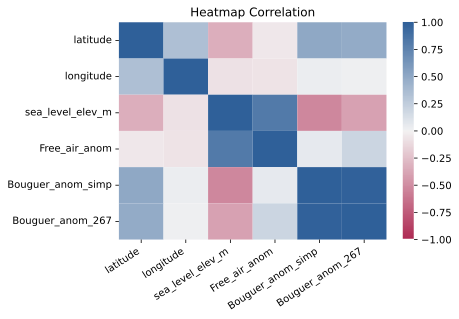

CPU times: user 882 ms, sys: 84.4 ms, total: 967 ms
Wall time: 2.52 s


In [ ]:
#@title Heatmap Correlation
%%time

colomb97.corr().to_csv('colomb97_corr.csv')
colomb97_corr = pd.read_csv(
    'colomb97_corr.csv',
    index_col=0
    )
display(colomb97_corr)

dMarkdown('**Colomb97 Heatmap_corr:**')
heatmap=sns.heatmap(
    colomb97_corr,
    vmin=-1,
    vmax=+1,
    cmap=sns.diverging_palette(
        0, 250,
        s=80, l=40,
        n=1000,
        as_cmap=True,
        center='light'
        )
    )
heatmap.set_xticklabels(
    heatmap.get_xticklabels(),
    rotation=33,
    horizontalalignment='right'
    )
plt.title('Heatmap Correlation')
plt.savefig(
    'colomb97_heatmap.pdf',
    bbox_inches='tight'
    )
plt.show()

In [ ]:
#@title Colomb97 Pairplot
%%time

dMarkdown('**Colomb97 Pairplot:**')
sns.pairplot(
    colomb97.sample(3000),
    kind='hist',
    plot_kws={'bins':'sqrt'},
    diag_kind='kde',
    height=2
    ).fig.suptitle(
        'Colomb97 Pairplot',
        y=1.02
        )
plt.savefig(
    'colomb97_pairplot.pdf',
    bbox_inches='tight'
    )
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#@title Split Dataset
#@markdown `RandomState(137)`
my_test_size=1/3
rng = np.random.RandomState(137)
colomb97_train, colomb97_test = train_test_split(
    colomb97,
    test_size=my_test_size,
    random_state=rng,
    )

colomb97_train.to_csv('colomb97_train.csv')
dMarkdown('**Train Sorted:**')
display(colomb97_train.sort_index())

colomb97_test.to_csv('colomb97_test.csv')
dMarkdown('**Test Sorted:**')
display(colomb97_test.sort_index())

<IPython.core.display.Javascript object>

**Train Sorted:**

,latitude,longitude,sea_level_elev_m,Free_air_anom,Bouguer_anom_simp,Bouguer_anom_267
station_id,,,,,,
2,7.56000,-73.16500,975.00,4.46,-104.60,-93.72
6,7.69000,-73.09670,1290.00,38.49,-105.90,-93.75
8,7.74500,-73.05500,2050.00,136.63,-92.76,-75.37
9,7.69500,-73.28330,512.00,-17.91,-75.21,-70.53
11,7.79667,-73.34830,204.00,-65.13,-87.96,-82.56
...,...,...,...,...,...,...
9046,3.88333,-76.99333,60.58,-55.96,-62.74,-62.07
9047,3.88833,-77.01667,51.83,-58.04,-63.84,-63.33
9048,3.88333,-77.01500,39.15,-59.40,-63.78,-63.23


**Test Sorted:**

,latitude,longitude,sea_level_elev_m,Free_air_anom,Bouguer_anom_simp,Bouguer_anom_267
station_id,,,,,,
1,7.57167,-73.19830,750.00,-17.42,-101.30,-92.48
3,7.65000,-73.22000,550.00,-31.69,-93.24,-86.08
4,7.65500,-73.17830,730.00,-16.26,-97.95,-88.07
5,7.66000,-73.12670,1000.00,-1.60,-113.50,-99.03
7,7.72833,-73.07670,1650.00,80.20,-104.40,-88.80
...,...,...,...,...,...,...
9028,3.84667,-76.81833,163.17,-5.39,-23.65,-22.27
9034,3.86500,-76.87500,181.85,-8.47,-28.82,-27.33
9036,3.86833,-76.89500,204.99,-11.82,-34.76,-33.35
